<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_classfication_tipoVinho_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Machine Learning  Previsão se o vinho é RED ou White


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
base = pd.read_csv('/content/wine_dataset.csv')

In [3]:
base.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
base['style'] = base['style'].replace('red',0)
base['style'] = base['style'].replace('white',1)

In [5]:
base.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [7]:
base.shape

(6497, 13)

In [10]:
np.unique(base['style'], return_counts=True)

(array(['red', 'white'], dtype=object), array([1599, 4898]))

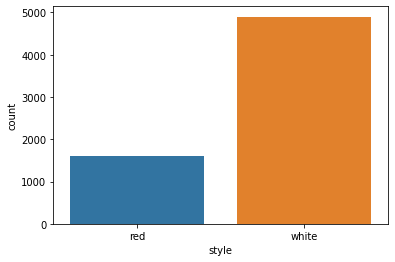

In [8]:
sns.countplot( x = base['style']);

-  Treinamento

In [14]:
x = base.iloc[:,0:12].values
y = base.iloc[:,12].values

In [15]:
x.shape

(6497, 12)

In [16]:
y.shape

(6497,)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=0)

In [19]:
x_treino.shape

(4547, 12)

In [20]:
y_treino.shape

(4547,)

In [21]:
x_teste.shape

(1950, 12)

In [22]:
y_teste.shape

(1950,)

- Algoritimo de Decision Tree

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

In [24]:
tree = ExtraTreesClassifier(n_estimators=50, criterion='entropy')

In [25]:
tree.fit(x_treino, y_treino)

ExtraTreesClassifier(criterion='entropy', n_estimators=50)

In [26]:
previsao = tree.predict(x_teste)

In [27]:
previsao

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
y_teste

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
from sklearn.metrics import accuracy_score, classification_report

In [30]:
accuracy_score(y_teste, previsao)

0.9974358974358974

excelente previsão de classficação

In [32]:
from yellowbrick.classifier import ConfusionMatrix

0.9974358974358974

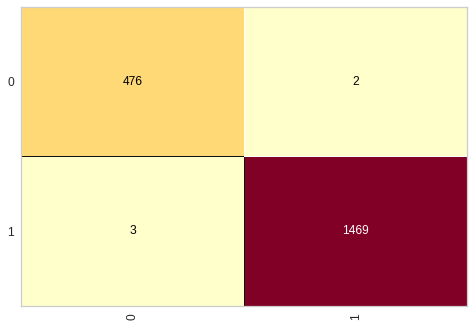

In [33]:
cm = ConfusionMatrix(tree)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

resultados praticamente perfeitos

In [34]:
print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       478
           1       1.00      1.00      1.00      1472

    accuracy                           1.00      1950
   macro avg       1.00      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950



com detalhes, podemos ver a previsao quase perfeita do algoritimo